# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [81]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [82]:
data = pd.read_csv('train.csv')

In [83]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [84]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [85]:
# -- YOUR CODE HERE --
data.isnull().sum()

id 0
keyword 61
location 2533
text 0
target 0
dtype: int64

Видим, что в данных есть пропуски, а именно по значениям `key` и `location`, заменим их на пустую строку для трейна и теста.

In [86]:
train = train.fillna('')
test = test.fillna('')

Проверим теперь данные на наличие пустых значений

In [87]:
train.isna().sum()

id 0
keyword 0
location 0
text 0
target 0
dtype: int64

In [88]:

test.isna().sum()

id 0
keyword 0
location 0
text 0
target 0
dtype: int64

Пустых значений теперь нет

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?

In [89]:
# -- YOUR CODE HERE --
inf = train['target'].value_counts()
print(f'Первого класса (0) в выборке {round(inf[0]/inf.sum()*100, 2)}%')
print(f'Второго класса (1) в выборке {round(inf[1]/inf.sum()*100, 2)}%')
inf

Первого класса (0) в выборке 56.75%
Второго класса (1) в выборке 43.25%


0 3024
1 2305
Name: target, dtype: int64

Довольно хорошее соотношение классов в обучающей выборке, каждого класса примерно 40-50%,то есть сбалансированное соотношение классов.

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [90]:
frequency = train['keyword'].value_counts() # Возвращает отсортированные в порядке убывания частоты встречаемости значений
names = frequency.index
popular_keywords = names[1:11] # 0-ое значение это пустая строка, его не берем в расчет
print(*list(popular_keywords), sep = ",")

damage,siren,wreckage,fatalities,deluge,refugees,derail,fear,tsunami,fatality


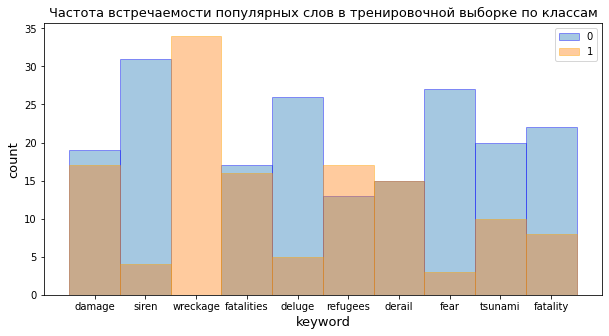

In [91]:
# -- YOUR CODE HERE --
freq_words_0 = train.groupby('target')['keyword'].value_counts()[0]   # слово-частота для 0 класса
freq_words_1 = train.groupby('target')['keyword'].value_counts()[1]   # слово-частота для 1 класса
p = []
f = []
for el in popular_keywords:
    if el in freq_words_0.index:
        p.append(freq_words_0[el])  # Из фрейма слово-частота выбираем нужные нам слова из списка популярных слов для 0 класса
    else:
        p.append(0)
    if el in freq_words_1.index:
        f.append(freq_words_1[el])  # Делаем то же самое для 1 класса
    else:
        f.append(0)

plt.figure(figsize=(10, 5))
plt.bar(popular_keywords, p, width = 1, alpha = 0.4, edgecolor = 'blue')
plt.bar(popular_keywords, f, width = 1, alpha = 0.4, edgecolor = 'orange')
plt.xticks(range(10), popular_keywords, fontsize = 10)
plt.xlabel("keyword", fontsize = 13)
plt.ylabel("count", fontsize = 13)
plt.title("Частота встречаемости популярных слов в тренировочной выборке по классам", fontsize = 13)
plt.legend(train['target'], loc = 1)
plt.show()

**Выводы**: Видим, что для первого класса больше всего встречается слово `wreckage`, `refugees`, прилагательные, характеризующие какие-то аварии и разрушения. Для второго класса же больше всего встречается слово `siren`, `deluge`, `fear`, `tsunami`, `fatality`, все, что связано со страхом, стихийными бедствиями, катастрофами. У двух классов примерно одинаковая частота встречаемости слов `derail`, `damage`, `fatalities`. Эти особенности и определяют метки классов.

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [92]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [93]:
# -- YOUR CODE HERE --

In [94]:
train['text'] = train[['keyword', 'location', 'text']].agg(' '. join, axis = 1)   # заменили столбец text слепленными тремя колонками
train_new = train[["text", "target"]]
train_new.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


In [95]:
test['text'] = test[['keyword', 'location', 'text']].agg(' '. join, axis = 1)    # То же самое для теста
test_new = test[["text", "target"]]

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

# -- YOUR CODE HERE --
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train["text"])
X = pd.DataFrame(X.toarray(), columns=cnt_vec.get_feature_names_out())
print(f'Размер матрицы: {X.shape}')

Размер матрицы: (5329, 18455)


Получилась довольно большая матрица

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [116]:
word_freq = cnt_vec.vocabulary_   # Словарь с частотами встречаемости слов в текстах
word_freq

{'bridge': 5275,
 '%': 1472,
 '20collapse': 1800,
 'ashes': 4530,
 '2015': 1773,
 ':': 2229,
 'australia': 4628,
 '\x89': 19587,
 'ûªs': 19640,
 'collapse': 6032,
 'at': 4567,
 'trent': 18450,
 'among': 4300,
 'worst': 19368,
 'in': 12552,
 'history': 8949,
 'england': 7415,
 'bundled': 5388,
 'out': 14999,
 'for': 8041,
 '60': 2077,
 '...': 1512,
 'http://t.co/t5trhjuau0': 11456,
 'hail': 8661,
 'carol': 5600,
 'stream': 17648,
 ',': 1483,
 'illinois': 12503,
 'great': 8518,
 'michigan': 14071,
 'technique': 18025,
 'camp': 5510,
 'b1g': 4691,
 'thanks': 18124,
 'to': 18284,
 '@bmurph1019': 2490,
 '@hail_youtsey': 2905,
 '.': 1509,
 '@termn8r13': 3718,
 '#goblue': 520,
 '#wrestleon': 1442,
 'http://t.co/oaskgki6qj': 10996,
 'police': 15494,
 'houston': 9082,
 'cnn': 5982,
 'tennessee': 18063,
 'movie': 14348,
 'theater': 18131,
 'shooting': 17007,
 'suspect': 17851,
 'killed': 13124,
 'by': 5442,
 'http://t.co/di8elzswnr': 9897,
 'rioting': 16377,
 'still': 17597,
 'a': 3943,
 'couple

In [98]:
import re
import string
def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    # -- YOUR CODE HERE --
    if re.search(r'\d', s):
        return True
    else:
        return False

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    # -- YOUR CODE HERE --
    if any(char in string.punctuation for char in s):
        return True
    else:
        return False

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    # -- YOUR CODE HERE --
    if s[0] == "#":
        return True
    else:
        return False

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    # -- YOUR CODE HERE --
    if s[0] == "@":
        return True
    else:
        return False

def investigate_vocabulary(vocabulary):
    # -- YOUR CODE HERE --
    dig = map(contains_digit, vocabulary)
    punc = map(contains_punctuation, vocabulary)
    hashta = map(is_hashtag, vocabulary)
    mentions = map(is_mention, vocabulary)
    print('With digit:      ', sum(list(dig))
          )
    print('With punctuation:', sum(list(punc))
          )
    print('Hashtags:        ', sum(list(hashta))
          )
    print('Mentions:        ', sum(list(mentions))
          )



In [99]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


Нашлось 2 слова, содержащих цифры, 7 слов со знаками препинания, 1 с хэштегом, 3 слова с упоминаниями.

In [100]:
investigate_vocabulary(word_freq)

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


Получаем, что в нашем словаре нет упоминаний и хэштегов, зато 3812 раз встречаются слова с цифрами и 315 раз со знаками препинания.

## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [101]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer
help(TweetTokenizer)

Help on class TweetTokenizer in module nltk.tokenize.casual:

class TweetTokenizer(nltk.tokenize.api.TokenizerI)
 |  TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False, match_phone_numbers=True)
 |  
 |  Tokenizer for tweets.
 |  
 |      >>> from nltk.tokenize import TweetTokenizer
 |      >>> tknzr = TweetTokenizer()
 |      >>> s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
 |      >>> tknzr.tokenize(s0) # doctest: +NORMALIZE_WHITESPACE
 |      ['This', 'is', 'a', 'cooool', '#dummysmiley', ':', ':-)', ':-P', '<3', 'and', 'some', 'arrows', '<', '>', '->',
 |       '<--']
 |  
 |  Examples using `strip_handles` and `reduce_len parameters`:
 |  
 |      >>> tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
 |      >>> s1 = '@remy: This is waaaaayyyy too much for you!!!!!!'
 |      >>> tknzr.tokenize(s1)
 |      [':', 'This', 'is', 'waaayyy', 'too', 'much', 'for', 'you', '!', '!', '!']
 |  
 |  Method resolution order:
 |     

In [102]:
# -- YOUR CODE HERE --
tw = TweetTokenizer()
cnt_vec = CountVectorizer(tokenizer=tw.tokenize)
X1 = cnt_vec.fit_transform(train["text"])

In [103]:
investigate_vocabulary(cnt_vec.vocabulary_)

With digit:       3939
With punctuation: 7338
Hashtags:         1470
Mentions:         1679


**Сравнение:** Видим, что через этот токенайзер уже больше значений в словаре, потому что он стал выделять отдельные знаки препинания, как отдельные значения - смайлики, кроме того, этот специальный для твиттера токенайзер распознает хештеги и упоминания.

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer


In [104]:
import nltk
nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    # -- YOUR CODE HERE --
    if s.isalpha():
        return bool(re.search(r"[a-zA-Z]+", s))   # Используем регулярное выражение для всех латинских символов
    else:
        return False

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    # -- YOUR CODE HERE --
    return bool(re.search(r'^[^\w\s]*[()]+[^\w\s]*$', s))

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    # -- YOUR CODE HERE --
    if s[0] == "#" and contains_only_latin_letters(s[1:]):  # Проверяем, чтобы вначале был #, остальная часть чтобы была из латинских букв
        return True
    else:
        return False
    
def custom_tokenizer(s: str) -> List[str]:    
    # Кастомный токенайзер
    # -- YOUR CODE HERE --
    List1 = tw.tokenize(s.lower()) # Токенизируем переведенную в нижний регистр строку
    result = []
    ss = SnowballStemmer("english")
    for word in List1:
        if (contains_only_latin_letters(word) or is_emoji(word) or is_hashtag(word)) and (word not in stopwords.words("english")):
            result.append(ss.stem(word))   # Слово должно в системе: (не относиться к стоп-словам) и (принадлежать одной из групп: 1) слова из латинских букв, 2) смайлики, 3) хэштеги)
    return result
  

In [105]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

In [106]:
train_new["text"][:10]

1186 bridge%20collapse Ashes 2015: AustraliaÛªs c...
4071 hail Carol Stream, Illinois GREAT MICHIGAN TEC...
5461 police Houston CNN: Tennessee movie theater s...
5787 rioting Still rioting in a couple of hours le...
7445 wounds Lake Highlands Crack in the path where ...
151 airplane%20accident Somewhere Out There Expert...
915 bloody Isolated City In World Perth 'I came to...
1305 burning @JohnsonTionne except idk them?? it's...
2570 destroy he/him or she/her (ask) destroy the house
7399 wounded Maracay y Nirgua, Venezuela Police Off...
Name: text, dtype: object

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [107]:
# -- YOUR CODE HERE --
for line in train_new["text"][:10]:
    print(custom_tokenizer(line))

['bridg', 'ash', 'australia', 'ûªs', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class']
['wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee']
['airplan', 'somewher', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#mlb']
['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast']
['burn', 'except', 'idk', 'realli', 'burn']
['destroy', '(', 'ask', ')', 'destroy', 'hous']
['wound', 'maracay', 'nirgua', 'venezuela', 'polic', 'offic', 'wound', '

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.

In [108]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
# -- YOUR CODE HERE --
X_train = train_new["text"]
X_test = test_new["text"]
y_train = train_new["target"]
y_test = test_new["target"]
train1 = vectorizer.fit_transform(X_train)
test1 = vectorizer.transform(X_test)

2. Обучите LogisticRegression на полученных признаках.

In [109]:
from sklearn.linear_model import LogisticRegression
# -- YOUR CODE HERE --
clf = LogisticRegression()
clf.fit(train1, y_train)
y_pred = clf.predict(test1)

3. Посчитайте метрику f1-score на тестовых данных.

In [110]:
from sklearn.metrics import f1_score

# -- YOUR CODE HERE --
print(f'Метрика f1-score через Count-Vectorizer: {f1_score(y_test, y_pred)}')

Метрика f1-score через Count-Vectorizer: 0.7512090274046211


## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1
tfidf_vec = TfidfVectorizer(tokenizer=custom_tokenizer)
train2 = tfidf_vec.fit_transform(X_train)
test2 = tfidf_vec.transform(X_test)
clf2 = LogisticRegression()
clf2.fit(train2, y_train)
y_pred2 = clf2.predict(test2)
print(f'Метрика f1-score через TfidfVectorizer: {f1_score(y_test, y_pred2)}')

Метрика f1-score через TfidfVectorizer: 0.7437465258476932


1. **Ответ:** Качество незначительно ухудшилось через TfidfVectorizer.

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?

In [112]:
# 2
tfidf_vec = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)
train3 = tfidf_vec.fit_transform(X_train)
test3 = tfidf_vec.transform(X_test)
clf3 = LogisticRegression()
clf3.fit(train3, y_train)
y_pred3 = clf3.predict(test3)

In [113]:
# -- YOUR CODE HERE --
print(f'Размер матрицы был: {train2.shape}')
print(f'Размер матрицы стал: {train3.shape}')
print(f'Метрика f1-score через TfidfVectorizer: {f1_score(y_test, y_pred2)}')

Размер матрицы был: (5329, 10575)
Размер матрицы стал: (5329, 10575)
Метрика f1-score через TfidfVectorizer: 0.7437465258476932


2. **Ответ:** Установление верхней планки встречаемости слова не повлияло на размер матрицы и на `f1-score`, что свидетельствует об отсутствии настолько часто встречающихся слов.

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [119]:
# 3
tfidf_vec = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=0.001, max_df=0.9)
train4 = tfidf_vec.fit_transform(X_train)
test4 = tfidf_vec.transform(X_test)
clf4 = LogisticRegression()
clf4.fit(train4, y_train)
y_pred4 = clf4.predict(test4)
print(f'Размер матрицы был: {train3.shape}')
print(f'Размер матрицы стал: {train4.shape}')
print(f'Метрика f1-score через TfidfVectorizer: {f1_score(y_test, y_pred4)}')

Размер матрицы был: (5329, 10575)
Размер матрицы стал: (5329, 1747)
Метрика f1-score через TfidfVectorizer: 0.7449259462424574


1. **Ответ:** Чем сильнее мы увеличиваем минимальный размер `document frecuency`, тем большая часть часть слов отсеивается, признаков становится меньше (матрица становится меньше), обучаемся быстрее и при этом наша `f1` метрика качества немного выросла, но если сильно увеличивать `min_df`, то `f1` будет уменьшаться.

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.

In [115]:
from sklearn.feature_extraction.text import HashingVectorizer
import warnings
warnings.filterwarnings("ignore")

# -- YOUR CODE HERE --
hv = HashingVectorizer(tokenizer=custom_tokenizer, n_features = 5000)
train5 = hv.fit_transform(X_train)
test5 = hv.transform(X_test)
clf5 = LogisticRegression()
clf5.fit(train5, y_train)
y_pred5 = clf5.predict(test5)
print(f'F1 score: {f1_score(y_test, y_pred5)}')

F1 score: 0.7193763919821827


2. Какой из подходов показал самый высокий результат?

2. **Ответ:** Через `HashingVectorizer` получилось более низкое значение `f1` метрики качества. Самый лучший результат показал `CountVectorizer` с использованием созданного нами токенизатора.

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

Наибольшая `f1-мера` уже была получена в __8 задании__ через *CountVectorizer(tokenizer=custom_tokenizer)*.